# 4. Logistic Regression

In [3]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from ML_basic_function import *

- Generalized liner model

In [2]:
np.random.seed(24)
x = np.linspace(0, 4, 20).reshape(-1, 1)
x = np.concatenate((x, np.ones_like(x)), axis=1)
x

array([[0.        , 1.        ],
       [0.21052632, 1.        ],
       [0.42105263, 1.        ],
       [0.63157895, 1.        ],
       [0.84210526, 1.        ],
       [1.05263158, 1.        ],
       [1.26315789, 1.        ],
       [1.47368421, 1.        ],
       [1.68421053, 1.        ],
       [1.89473684, 1.        ],
       [2.10526316, 1.        ],
       [2.31578947, 1.        ],
       [2.52631579, 1.        ],
       [2.73684211, 1.        ],
       [2.94736842, 1.        ],
       [3.15789474, 1.        ],
       [3.36842105, 1.        ],
       [3.57894737, 1.        ],
       [3.78947368, 1.        ],
       [4.        , 1.        ]])

In [3]:
y = np.exp(x[:, 0] + 1).reshape(-1, 1)
y

array([[  2.71828183],
       [  3.35525011],
       [  4.1414776 ],
       [  5.11193983],
       [  6.30980809],
       [  7.78836987],
       [  9.61339939],
       [ 11.86608357],
       [ 14.64663368],
       [ 18.07874325],
       [ 22.31509059],
       [ 27.54413077],
       [ 33.99847904],
       [ 41.96525883],
       [ 51.79887449],
       [ 63.93677707],
       [ 78.91892444],
       [ 97.41180148],
       [120.23806881],
       [148.4131591 ]])

$$y=e^{(x+1)}$$
$$y= w^T \cdot x + b$$

In [4]:
np.linalg.lstsq(x, y, rcond=-1)[0]

array([[ 30.44214742],
       [-22.37576724]])

$$y=30.44x-22.38$$

In [5]:
yhat = x[:, 0] * 30.44 - 22.38
yhat

array([-22.38      , -15.97157895,  -9.56315789,  -3.15473684,
         3.25368421,   9.66210526,  16.07052632,  22.47894737,
        28.88736842,  35.29578947,  41.70421053,  48.11263158,
        54.52105263,  60.92947368,  67.33789474,  73.74631579,
        80.15473684,  86.56315789,  92.97157895,  99.38      ])

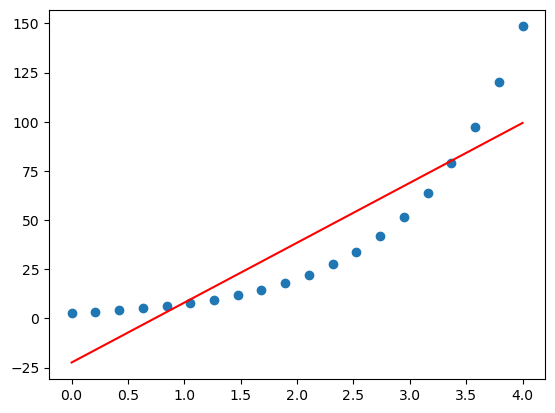

In [6]:
plt.plot(x[:, 0], y, 'o')
plt.plot(x[:, 0], yhat, 'r-')

$$y=e^{(\hat w^T \cdot \hat x)}$$

$$lny = \hat w^T \cdot \hat x$$

In [7]:
np.linalg.lstsq(x, np.log(y), rcond=-1)[0]

array([[1.],
       [1.]])

$$g(y)=\hat w^T \cdot \hat x$$

$$y = g^{-1}(\hat w^T \cdot \hat x)$$

$g(·)$ link function

logit linear model

- Logit model

$$odd(p)=\frac{p}{1-p}$$

$$logit(p) = ln\frac{p}{1-p}$$

log unit model 
logistic regression $$g(y)=ln\frac{y}{1-y}=\hat w^T \cdot \hat x$$

- Sigmoid

$$f(x) = \frac{1}{1+e^{-x}}$$

In [8]:
np.random.seed(24)
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))

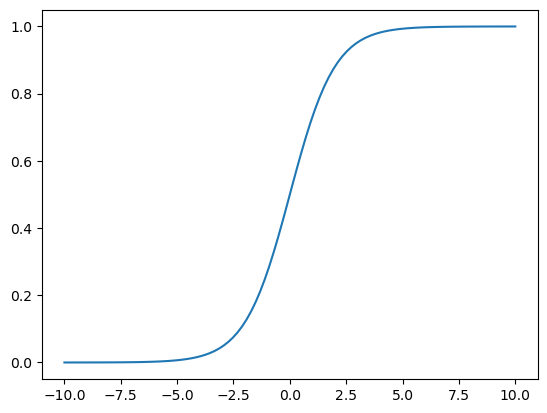

In [9]:
plt.plot(x, y)

$$Sigmoid(x) = \frac{1}{1+e^{-x}}$$

$$\begin{aligned}
Sigmoid'(x) &= Sigmoid(x)(1-Sigmoid(x))
\end{aligned}$$

In [10]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [11]:
def sigmoid_deri(x):
    return (sigmoid(x)*(1-sigmoid(x)))

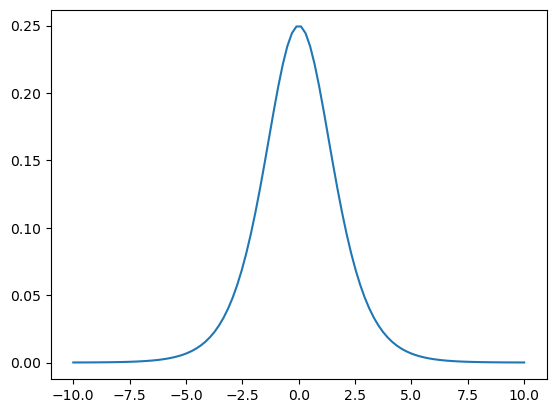

In [13]:
plt.plot(x, sigmoid_deri(x))

In [14]:
def logit_cla(yhat, thr=0.5):
  
    ycla = np.zeros_like(yhat)
    ycla[yhat >= thr] = 1
    return ycla

In [15]:
logit_cla(yhat)

array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

- Multi-class learning and multi-class logistic regression

One vs Ons，OvO
One vs Rest，OvR 
Many vs Many，MvM

- OvO

<center><img src="https://i.loli.net/2021/04/19/NT8MEoSJcdFaVL9.jpg" alt="81" style="zoom:33%;" />

- OvR

<center><img src="https://i.loli.net/2021/04/19/t9fKCdqOnwgJmEM.jpg" alt="83" style="zoom:33%;" />

- MvM

<center><img src="https://i.loli.net/2021/04/19/rCJLkghq5ROj1p6.jpg" alt="85" style="zoom:33%;" />

<center><img src="https://i.loli.net/2021/04/19/v1AN2FZztLpVYbl.jpg" alt="86" style="zoom:33%;" />

<center><img src="https://i.loli.net/2021/04/19/hydDjczHIvS8EsV.jpg" alt="87" style="zoom:33%;" />

- Euclidean distance

$$d(x, y) = \sqrt{\sum_{i = 1}^{n}(x_i-y_i)^2}$$

- Manhattan Distance

$$d(x, y) =\sum_{i = 1}^{n}(|x_i-y_i|)$$

- Minkowski distance

$$d(x, y) = \sqrt[n]{\sum_{i = 1}^{n}(|x_i-y_i|)^n}$$

In [16]:
def dist(x, y, cat = 2):

    d1 = np.abs(x - y)
    if x.ndim > 1 or y.ndim > 1:
        res1 = np.power(d1, cat).sum(1)
    else:
        res1 = np.power(d1, cat).sum()
    res = np.power(res1, 1/cat)
    return res

In [17]:
x = np.array([1, 2])
y = np.array([2, 3])
dist(x, y)
np.sqrt(2)

1.4142135623730951

In [18]:
code_mat = np.array([[1, -1, 1, -1],
                     [-1, -1, 1, -1],
                     [-1, -1, -1, 1],
                     [-1, 1, -1, 1]])

data_code = np.array([1, -1, 1, 1])

In [19]:
dist(code_mat, data_code)

array([2.        , 2.82842712, 2.82842712, 3.46410162])

- Maximum Likelihood Estimate & relative entropy

Entropy

$$H(X) = -\sum^n_{i=1}p(x_i)log(p(x_i))$$

In [20]:
def entropy(p):
    if p == 0 or p == 1:
        ent = 0
    else:
        ent = -p * np.log2(p) - (1-p) * np.log2(1-p)
    return ent

Text(0, 0.5, 'Entropy')

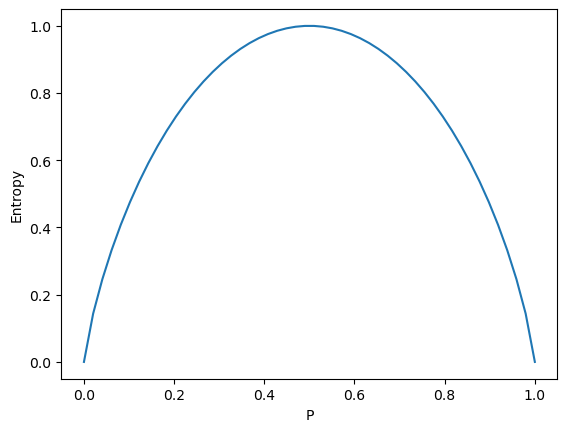

In [21]:
p = np.linspace(0, 1, 50)
ent_l = [entropy(x) for x in p]
plt.plot(p, ent_l)
plt.xlabel('P')
plt.ylabel('Entropy')

- relative entropy & cross entropy

Kullback-Leibler or information divergence
$$
D_{KL}(P||Q)=\sum ^n_{i=1}P(x_i)log(\frac{P(x_i)}{Q(x_i)})
$$

$$cross\_entropy(P,Q) = -\sum ^n_{i=1}P(x_i)log(Q(x_i))$$

$D_{KL}(P||Q)=-H(P(x))+[-\sum ^n_{i=1}P(x_i)log(Q(x_i))]$，相对熵=交叉熵-信息熵

In [22]:
def BCE(y, yhat):
    """
    binary classification cross entropy
    """
    return(-(1/len(y))*np.sum(y*np.log2(yhat)+(1-y)*np.log2(1-yhat)))

- Gradient Descent

In [23]:
def gd(lr = 0.02, itera_times = 20, w = 10):
                            
    results = [w]
    for i in range(itera_times):
        w -= lr * 28 * (w - 2)            
        results.append(w)
    return results

In [24]:
res = gd()
res

[10,
 5.52,
 3.5488,
 2.681472,
 2.29984768,
 2.1319329792,
 2.058050510848,
 2.02554222477312,
 2.0112385789001728,
 2.004944974716076,
 2.0021757888750735,
 2.0009573471050324,
 2.000421232726214,
 2.000185342399534,
 2.000081550655795,
 2.00003588228855,
 2.000015788206962,
 2.0000069468110633,
 2.000003056596868,
 2.000001344902622,
 2.000000591757154]

In [25]:
def show_trace(res):

    f_line = np.arange(-6, 10, 0.1)
    plt.plot(f_line, [14 * np.power(x-2, 2) for x in f_line])
    plt.plot(res, [14 * np.power(x-2, 2) for x in res], '-o')
    plt.xlabel('x')
    plt.ylabel('Loss(x)')

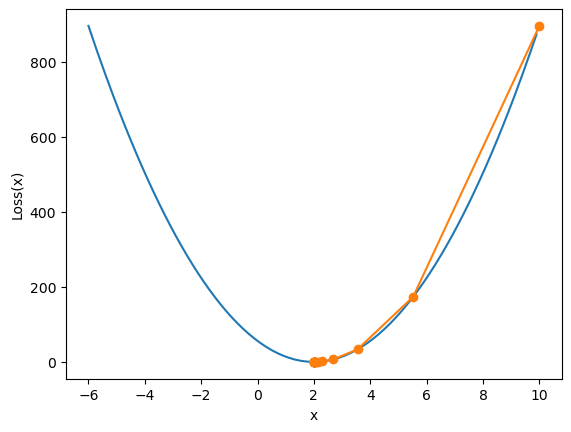

In [26]:
show_trace(res)

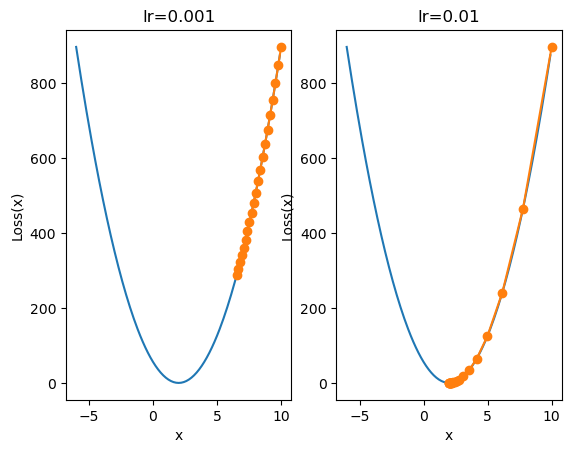

In [27]:
plt.subplot(121)
plt.title('lr=0.001')
show_trace(gd(lr=0.001))
plt.subplot(122)
plt.title('lr=0.01')
show_trace(gd(lr=0.01))

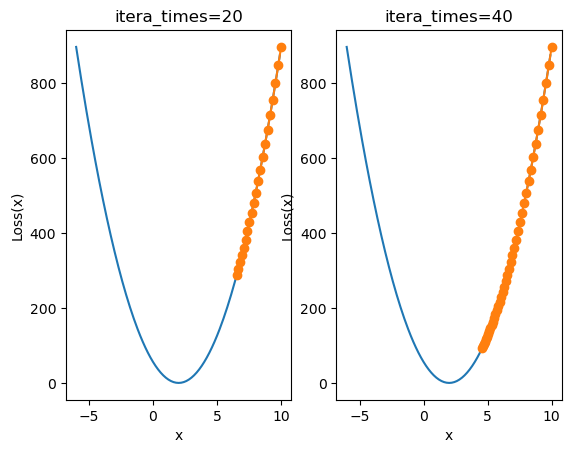

In [28]:
plt.subplot(121)
plt.title('itera_times=20')
show_trace(gd(itera_times=20, lr=0.001))
plt.subplot(122)
plt.title('itera_times=40')
show_trace(gd(itera_times=40, lr=0.001))

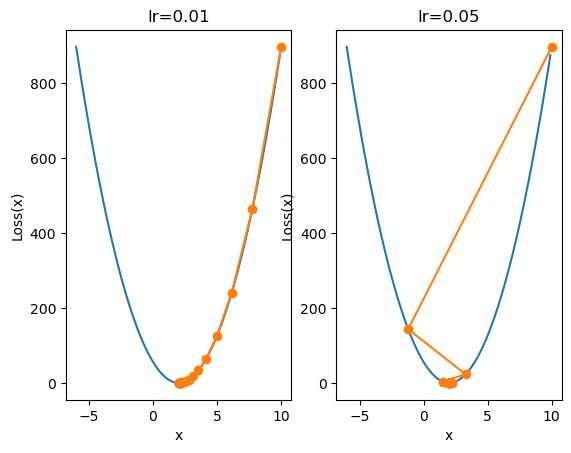

In [29]:
plt.subplot(121)
plt.title('lr=0.01')
show_trace(gd(lr=0.01))
plt.subplot(122)
plt.title('lr=0.05')
show_trace(gd(lr=0.05))

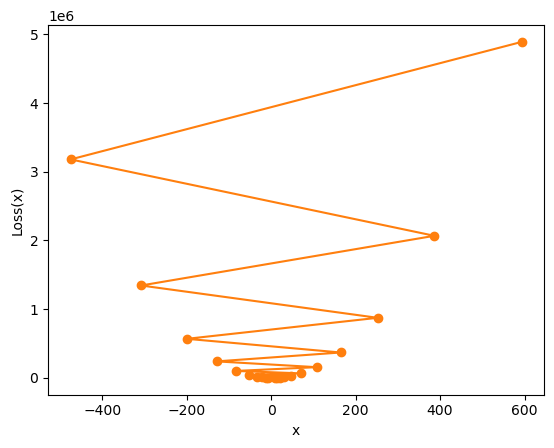

In [30]:
show_trace(gd(lr=0.08))

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

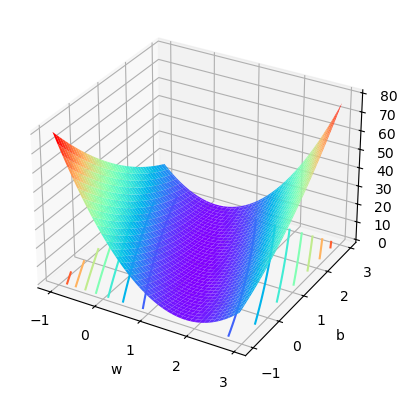

In [31]:
x = np.arange(-1,3,0.05)
y = np.arange(-1,3,0.05)
w, b = np.meshgrid(x, y)
SSE = (2 - w - b) ** 2 + (4 - 3 * w - b) ** 2

ax = plt.axes(projection='3d')

ax.plot_surface(w, b, SSE, cmap='rainbow')
ax.contour(w, b, SSE, zdir='z', offset=0, cmap="rainbow")  #生成z方向投影，投到x-y平面
plt.xlabel('w')
plt.ylabel('b')
plt.show()

In [ ]:
def MSELoss(X, w, y):

    SSE = SSELoss(X, w, y)
    MSE = SSE / X.shape[0]
    return MSE

$$\begin{aligned}
\frac{SSELoss(\hat w)}{\partial{\boldsymbol{\hat w}}} 
&= 2X^T(X\hat w -y)
\end{aligned}$$

$$
\frac{MSELoss(\hat w)}{\partial{\boldsymbol{\hat w}}} = \frac{2X^T(X\hat w -y)}{m}
$$

In [ ]:
def lr_gd(X, w, y):

    m = X.shape[0]
    grad = 2 * X.T.dot((X.dot(w) - y)) / m
    return grad

In [ ]:
def w_cal_rec(X, w, y, gd_cal, lr = 0.02, itera_times = 20):
    w_res = [np.copy(w)]
    for i in range(itera_times):
        w -= lr * gd_cal(X, w, y)
        w_res.append(np.copy(w))
    return w, w_res

In [33]:
np.random.seed(24)
w = np.random.randn(2, 1)

In [37]:
import sys
sys.path.append(r"d:\\Practice\\Machine Learning\\04.Logistic Regression")
print('sys.path')
import ML_basic_function

sys.path


In [38]:
np.random.seed(24)
w = np.random.randn(2, 1)

In [42]:
features = np.array([1, 3]).reshape(-1, 1)
features = np.concatenate((features, np.ones_like(features)), axis=1)

In [40]:
labels = np.array([2, 4]).reshape(-1, 1)
labels

array([[2],
       [4]])

In [43]:
w, w_res = w_cal_rec(features, w, labels, gd_cal = lr_gd, lr = 0.1, itera_times = 100)

In [44]:
w

array([[1.02052278],
       [0.95045363]])

In [45]:
SSELoss(features, w, labels)
MSELoss(features, w, labels)
lr_gd(features, w, labels)

array([[ 0.0070423 ],
       [-0.01700163]])

In [ ]:
w_res

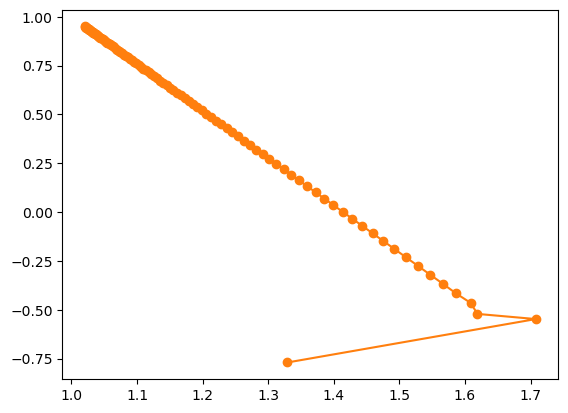

In [47]:
plt.plot(np.array(w_res)[:, 0], np.array(w_res)[:, 1], '-o', color='#ff7f0e')

In [48]:
x1, x2 = np.meshgrid(np.arange(1, 2, 0.001), np.arange(-1, 1, 0.001))

In [49]:
np.meshgrid(np.arange(3), np.arange(1, 5))

[array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]),
 array([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3],
        [4, 4, 4]])]

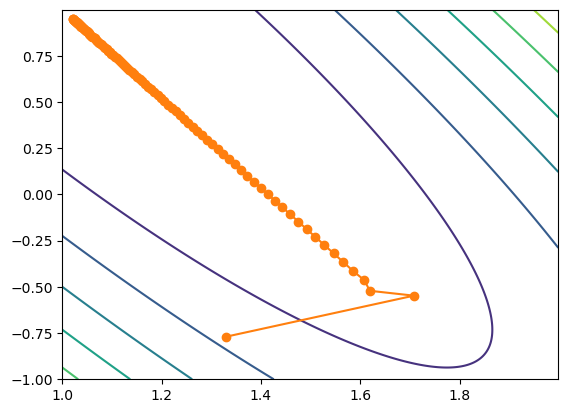

In [50]:
plt.contour(x1, x2, (2-x1-x2)**2+(4-3*x1-x2)**2)

plt.plot(np.array(w_res)[:, 0], np.array(w_res)[:, 1], '-o', color='#ff7f0e')

In [51]:
loss_value = np.array([MSELoss(features, np.array(w), labels) for w in w_res]).flatten()

In [52]:
loss_value

array([1.34405546e+00, 5.18623852e-01, 4.63471078e-01, 4.31655465e-01,
       4.02524386e-01, 3.75373031e-01, 3.50053485e-01, 3.26441796e-01,
       3.04422755e-01, 2.83888935e-01, 2.64740155e-01, 2.46882992e-01,
       2.30230325e-01, 2.14700907e-01, 2.00218974e-01, 1.86713872e-01,
       1.74119712e-01, 1.62375048e-01, 1.51422581e-01, 1.41208877e-01,
       1.31684104e-01, 1.22801792e-01, 1.14518608e-01, 1.06794137e-01,
       9.95906956e-02, 9.28731379e-02, 8.66086905e-02, 8.07667906e-02,
       7.53189365e-02, 7.02385492e-02, 6.55008424e-02, 6.10827019e-02,
       5.69625722e-02, 5.31203522e-02, 4.95372963e-02, 4.61959234e-02,
       4.30799317e-02, 4.01741188e-02, 3.74643078e-02, 3.49372780e-02,
       3.25807006e-02, 3.03830783e-02, 2.83336892e-02, 2.64225348e-02,
       2.46402910e-02, 2.29782625e-02, 2.14283405e-02, 1.99829634e-02,
       1.86350793e-02, 1.73781123e-02, 1.62059298e-02, 1.51128129e-02,
       1.40934286e-02, 1.31428034e-02, 1.22562995e-02, 1.14295918e-02,
      

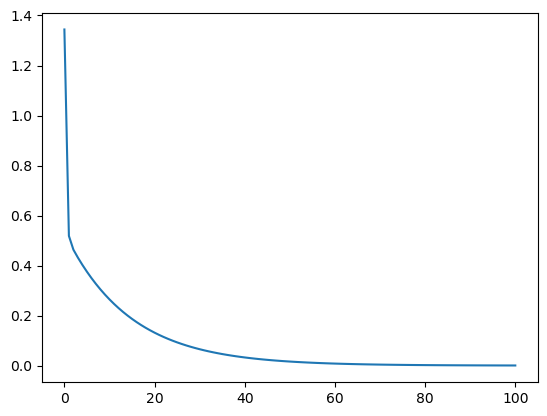

In [53]:
plt.plot(np.arange(101), loss_value)

In [55]:
def loss_vis(X, w_res, y, loss_func):
    loss_value = np.array([loss_func(X, np.array(w), y) for w in w_res]).flatten()
    plt.plot(np.arange(len(loss_value)), loss_value)

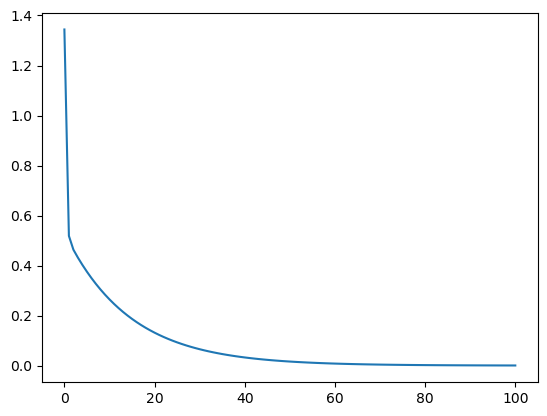

In [56]:
loss_vis(features, w_res, labels, MSELoss)

- Local munimum

In [57]:
x = np.arange(-1, 2, 0.1)
y = x * np.cos(np.pi * x)

Text(0, 0.5, 'x·cos(pi·x)')

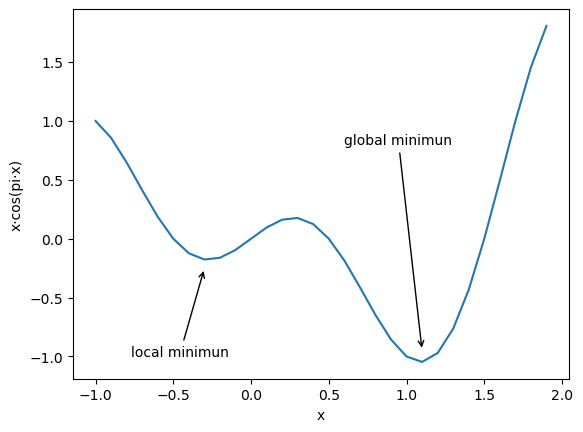

In [58]:
fig = plt.plot(x, y)[0]
fig.axes.annotate('local minimun', xytext=(-0.77, -1), 
                  arrowprops=dict(arrowstyle='->'), xy=(-0.3, -0.25))
fig.axes.annotate('global minimun', xytext=(0.6, 0.8), 
                  arrowprops=dict(arrowstyle='->'), xy=(1.1, -0.95))
plt.xlabel('x')
plt.ylabel('x·cos(pi·x)')

In [61]:
def f_1(x):
    return (x*np.cos(np.pi*x))

In [62]:
def f_gd_1(x):
    return (np.cos(np.pi*x)-x*np.pi*(np.sin(np.pi*x)))

In [65]:
f_1(-1)

1.0

In [64]:
f_gd_1(-1)

-1.0000000000000004

In [67]:
def gd_1(lr = 0.02, itera_times = 20, w = -1):
                            
    results = [w]
    for i in range(itera_times):
        w -= lr * f_gd_1(w)              # 梯度计算公式
        results.append(w)
    return results

In [68]:
res = gd_1(itera_times = 5000)
res[-1]

-0.2738526868008511

In [69]:
def show_trace_1(res):

    f_line = np.arange(-1, 2, 0.01)
    plt.plot(f_line, [f_1(x) for x in f_line])
    plt.plot(res, [f_1(x) for x in res], '-o')
    plt.xlabel('x')
    plt.ylabel('Loss(x)')

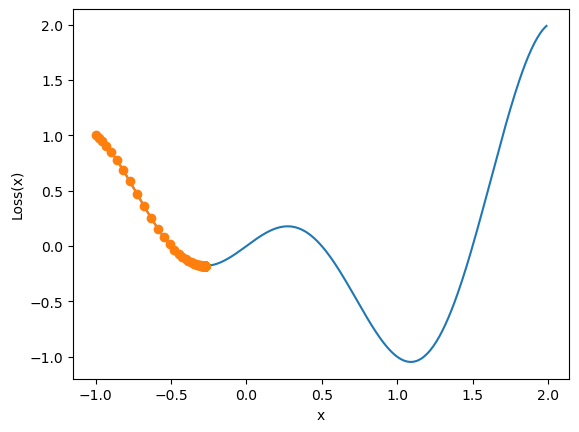

In [70]:
show_trace_1(res)

- saddle point

In [71]:
x = np.arange(-2, 2, 0.1)
y = np.power(x, 3)

Text(0, 0.5, 'x**3')

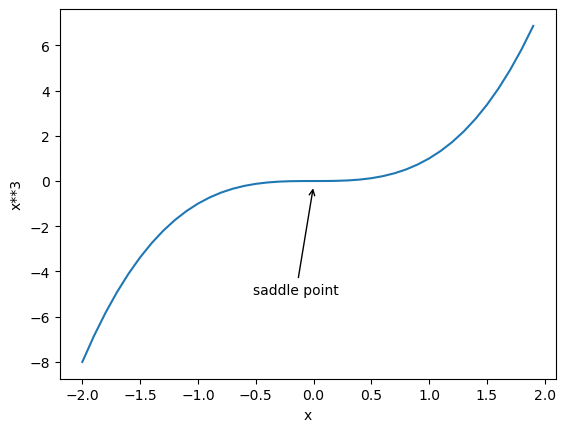

In [72]:
fig = plt.plot(x, y)[0]
fig.axes.annotate('saddle point', xytext=(-0.52, -5), 
                  arrowprops=dict(arrowstyle='->'), xy=(0, -0.2))
plt.xlabel('x')
plt.ylabel('x**3')

In [73]:
def f_2(x):
    return np.power(x, 3)

In [74]:
f_2(-1)

-1

In [75]:
def f_gd_2(x):
    return (3*np.power(x, 2))

In [76]:
f_gd_2(-1)

3

In [77]:
def gd_2(lr = 0.05, itera_times = 200, w = 1):
                              
    results = [w]
    for i in range(itera_times):
        w -= lr * f_gd_2(w)              
        results.append(w)
    return results

In [78]:
res = gd_2(itera_times=5000)
res[-1]

0.0013297766246039373

In [79]:
def show_trace_2(res):

    f_line = np.arange(-1, 2, 0.01)
    plt.plot(f_line, [f_2(x) for x in f_line])
    plt.plot(res, [f_2(x) for x in res], '-o')
    plt.xlabel('x')
    plt.ylabel('Loss(x)')

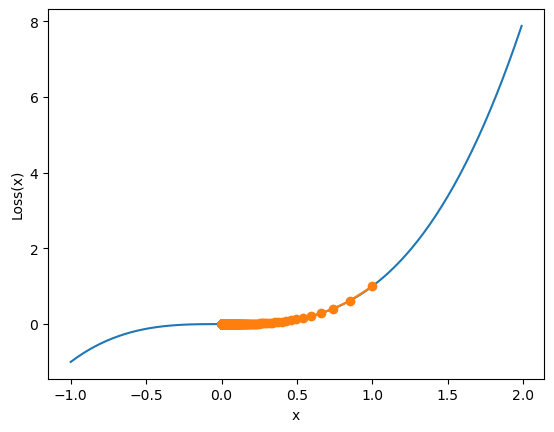

In [80]:
show_trace_2(res)

Text(0.5, 0.5, 'y')

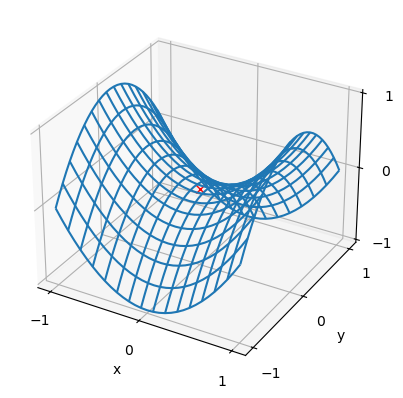

In [81]:
x, y = np.mgrid[-1:1:31j,-1:1:31j]
z = x**2- y**2
ax = plt.axes(projection='3d')
ax.plot_wireframe(x, y, z,**{'rstride':2,'cstride':2})
ax.plot([0],[0],[0],'rx')
ticks =[-1,0,1]
plt.xticks(ticks)
plt.yticks(ticks)
ax.set_zticks(ticks)
plt.xlabel('x')
plt.ylabel('y')

- SGD (Stochastic gradient descent & mini-batch gradient descent)

In [4]:
def sgd_cal(X, w, y, gd_cal, epoch, lr = 0.02):

    m = X.shape[0]
    n = X.shape[1]
    for j in range(epoch):
        for i in range(m):
            w = w_cal(X[i].reshape(1, n), w, y[i].reshape(1, 1), gd_cal=gd_cal, lr=lr, itera_times = 1)
    return w

In [5]:
w = 0
x = np.array([[1], [3]])
y = np.array([[2], [5]])
sgd_cal(x, w, y, lr_gd, epoch=40, lr=0.02)

array([[1.68879667]])

In [6]:
w = 0
w = w_cal(x, w, y, lr_gd, lr = 0.02, itera_times = 100)
w

array([[1.7]])

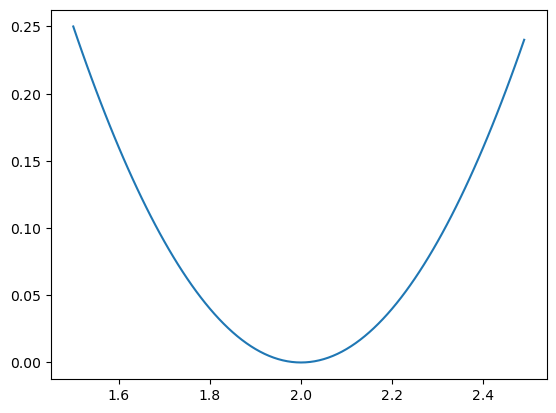

In [7]:
x1 = np.arange(1.5, 2.5, 0.01)
y1 = np.power(2-x1, 2)
plt.plot(x1, y1)

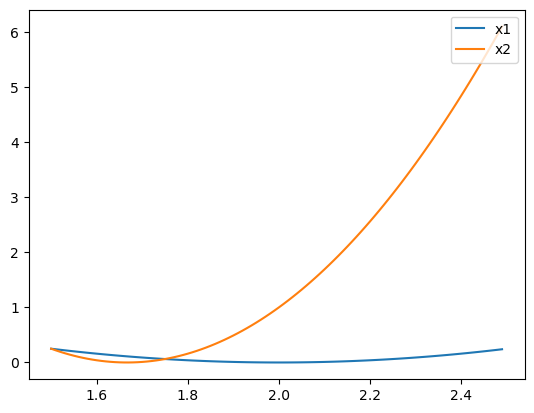

In [8]:
y2 = np.power(5-3*x1, 2)
plt.plot(x1, y1, label='x1')
plt.plot(x1, y2, label='x2')
plt.legend(loc = 1)

0.08
0.6512
0.705152
1.05129728
1.0892453888
1.297117048832
1.32523236687872
1.4481487148023808
1.4702227662102856
1.540942570374583
1.5593048675595995
1.5979551152381437
1.6140369106286179
1.6329836228023156
1.6476642778902229
1.6545051378497426
1.668324932335753
1.667727956694882
1.6810188384270868
1.6758520565933355
1.6888179743296021
1.6808435035709453
1.6936097634281075
1.6839102485939887
1.6965538386502292
1.6857944567361467
1.6983626784667007
1.6869521142186885
1.6994740296499409
1.687663378975962
1.7001568438169237
1.6881003800428311
1.7005763648411178
1.6883688734983155
1.7008341185583828
1.688533835877365
1.7009924824422704
1.688635188763053
1.701089781212531
1.6886974599760198
1.701149561576979
1.6887357194092665
1.7011862906328958
1.6887592260050532
1.7012088569648511
1.6887736684575048
1.7012227217192046
1.688782541900291
1.7012312402242795
1.6887879937435388
1.7012364739937973
1.6887913433560302
1.701239689621789
1.6887934013579449
1.701241665303627
1.6887946657943214
1.7

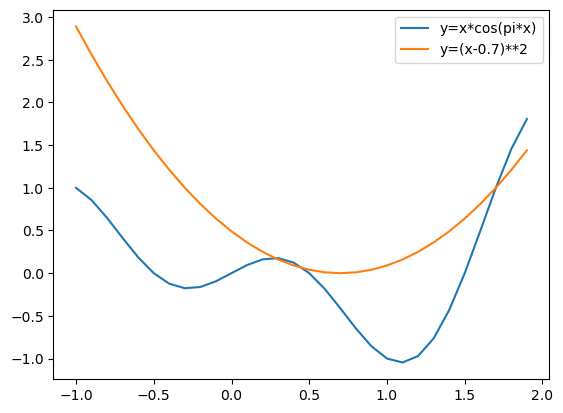

In [9]:
w = 0
epoch = 40
for j in range(epoch):
    for i in range(2):
        w = w_cal(x[i], w, y[i], lr_gd, lr = 0.02, itera_times = 1)
        print(w)
        
x1 = np.arange(-1, 2, 0.1)
y1 = x1 * np.cos(np.pi * x1)
y2 = np.power(x1-0.7, 2)
plt.plot(x1, y1, label='y=x*cos(pi*x)')
plt.plot(x1, y2, label='y=(x-0.7)**2')
plt.legend(loc = 1)

In [10]:
w = 1.5
MSE_l = [MSELoss(x, w, y)]
for j in range(20):
    for i in range(2):
        w = w_cal(x[i], w, y[i], lr_gd, lr = 0.02, itera_times = 1)
        MSE_l.append(MSELoss(x, w, y))

MSE_l

[array([[0.25]]),
 array([[0.212]]),
 array([[0.1308992]]),
 array([[0.11062326]]),
 array([[0.08400789]]),
 array([[0.07256093]]),
 array([[0.06511983]]),
 array([[0.05831952]]),
 array([[0.05726042]]),
 array([[0.05302137]]),
 array([[0.05384545]]),
 array([[0.05106918]]),
 array([[0.052281]]),
 array([[0.05036163]]),
 array([[0.05152127]]),
 array([[0.05011258]]),
 array([[0.05113054]]),
 array([[0.05002966]]),
 array([[0.05091919]]),
 array([[0.05000516]]),
 array([[0.05080017]]),
 array([[0.0500001]]),
 array([[0.05073113]]),
 array([[0.05000077]]),
 array([[0.05069026]]),
 array([[0.05000259]]),
 array([[0.05066574]]),
 array([[0.05000426]]),
 array([[0.05065089]]),
 array([[0.05000548]]),
 array([[0.05064185]]),
 array([[0.05000631]]),
 array([[0.05063632]]),
 array([[0.05000685]]),
 array([[0.05063294]]),
 array([[0.05000719]]),
 array([[0.05063087]]),
 array([[0.0500074]]),
 array([[0.0506296]]),
 array([[0.05000753]]),
 array([[0.05062882]])]

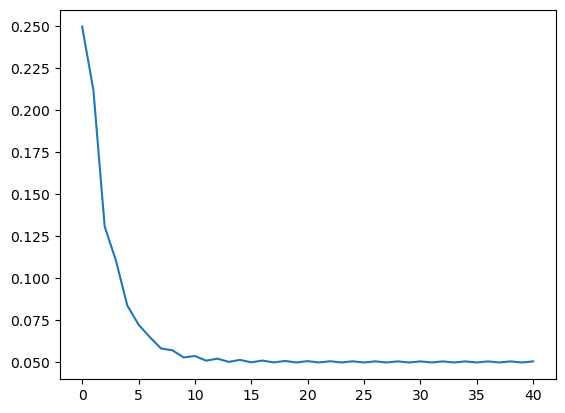

In [11]:
plt.plot(list(np.arange(41)), np.array(MSE_l).flatten())

In [22]:
# with mini-batch
def sgd_cal(X, w, y, gd_cal, epoch, batch_size=1, lr=0.02, shuffle=True, random_state=24):
      
    m = X.shape[0]
    n = X.shape[1]
    batch_num = np.ceil(m / batch_size)
    X = np.copy(X)
    y = np.copy(y)
    for j in range(epoch):
        if shuffle:            
            np.random.seed(random_state)                           
            np.random.shuffle(X)                            
            np.random.seed(random_state)
            np.random.shuffle(y)    
        for i in range(int(batch_num)):
            w = w_cal(X[i*batch_size: np.min([(i+1)*batch_size, m])], 
                      w, 
                      y[i*batch_size: np.min([(i+1)*batch_size, m])], 
                      gd_cal=gd_cal, 
                      lr=lr, 
                      itera_times=1)
    return w

In [16]:
np.random.seed(24)   

features, labels = arrayGenReg(delta=0.01)

In [17]:
Xtrain, Xtest, ytrain, ytest = array_split(features, labels, rate=0.7, random_state=24)

In [18]:
Xtrain.shape

(700, 3)

In [19]:
np.random.seed(24)  
w = np.random.randn(3, 1)
w

array([[ 1.32921217],
       [-0.77003345],
       [-0.31628036]])

In [23]:
w = sgd_cal(Xtrain, w, ytrain, lr_gd, batch_size=100, epoch=40, lr=0.02)
w

array([[ 1.99974065],
       [-0.99985936],
       [ 0.99932142]])

In [24]:
MSELoss(Xtrain, w, ytrain)

array([[9.41628892e-05]])

In [25]:
MSELoss(Xtest, w, ytest)

array([[9.08724026e-05]])

In [26]:
np.random.seed(24)  
w = np.random.randn(3, 1)

trainLoss_l = []
testLoss_l = []

epoch = 20

In [27]:
for i in range(epoch):
    w = sgd_cal(Xtrain, w, ytrain, lr_gd, batch_size=100, epoch=1, lr=0.02)
    trainLoss_l.append(MSELoss(Xtrain, w, ytrain))
    testLoss_l.append(MSELoss(Xtest, w, ytest))

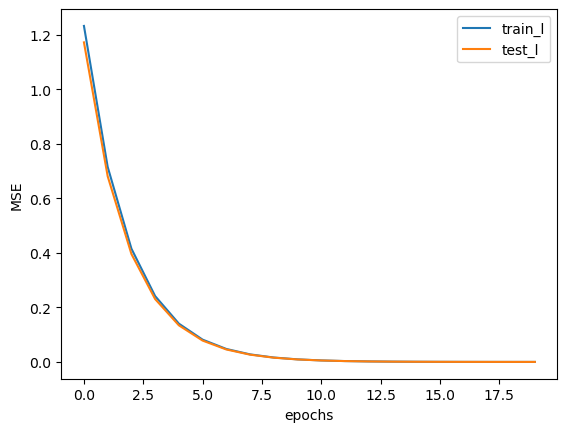

In [28]:
plt.plot(list(range(epoch)), np.array(trainLoss_l).flatten(), label='train_l')
plt.plot(list(range(epoch)), np.array(testLoss_l).flatten(), label='test_l')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend(loc = 1)

- Max-Min Normalization & Z-Score

$${x}_{normalization}=\frac{x-Min}{Max-Min}$$

In [29]:
a = np.arange(12).reshape(6, 2)
a

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [30]:
a.max(axis = 0)

array([10, 11])

In [31]:
np.max(a, 0)

array([10, 11])

In [32]:
a.min(axis = 0) 

array([0, 1])

In [33]:
a.max(axis = 0) - a.min(axis = 0) 

array([10, 10])

In [34]:
(a - a.min(axis = 0))

array([[ 0,  0],
       [ 2,  2],
       [ 4,  4],
       [ 6,  6],
       [ 8,  8],
       [10, 10]])

In [35]:
(a - a.min(axis = 0)) / (a.max(axis = 0) - a.min(axis = 0))

array([[0. , 0. ],
       [0.2, 0.2],
       [0.4, 0.4],
       [0.6, 0.6],
       [0.8, 0.8],
       [1. , 1. ]])

In [37]:
def maxmin_norm(X):

    maxmin_range = X.max(axis=0) - X.min(axis=0)
    return (X - X.min(axis=0)) / maxmin_range

In [38]:
maxmin_norm(a)

array([[0. , 0. ],
       [0.2, 0.2],
       [0.4, 0.4],
       [0.6, 0.6],
       [0.8, 0.8],
       [1. , 1. ]])

$${x}_{normalization}=\frac{x-\mu }{\sigma }$$

In [39]:
a.mean(0)

array([5., 6.])

In [40]:
a.std(0)

array([3.41565026, 3.41565026])

In [41]:
(a - a.mean(0))

array([[-5., -5.],
       [-3., -3.],
       [-1., -1.],
       [ 1.,  1.],
       [ 3.,  3.],
       [ 5.,  5.]])

In [42]:
(a - a.mean(0)) / a.std(0)

array([[-1.46385011, -1.46385011],
       [-0.87831007, -0.87831007],
       [-0.29277002, -0.29277002],
       [ 0.29277002,  0.29277002],
       [ 0.87831007,  0.87831007],
       [ 1.46385011,  1.46385011]])

In [43]:
def z_score(X):

    return (X - X.mean(axis=0)) / X.std(axis=0)

In [44]:
z_score(a)

array([[-1.46385011, -1.46385011],
       [-0.87831007, -0.87831007],
       [-0.29277002, -0.29277002],
       [ 0.29277002,  0.29277002],
       [ 0.87831007,  0.87831007],
       [ 1.46385011,  1.46385011]])

- Sigmoid

In [45]:
sigmoid(a)

array([[0.5       , 0.73105858],
       [0.88079708, 0.95257413],
       [0.98201379, 0.99330715],
       [0.99752738, 0.99908895],
       [0.99966465, 0.99987661],
       [0.9999546 , 0.9999833 ]])

In [48]:
from sklearn import datasets

iris_df=pd.load_iris()
iris_df

AttributeError: module 'pandas' has no attribute 'load_iris'

In [49]:
from sklearn import datasets

iris_df=datasets.load_iris()
iris_df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [52]:
import pandas as pd

iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['species'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [53]:
np.random.seed(24)   

features, labels = arrayGenReg(w = [200, -1, 1], delta=0.01)

In [54]:
features[:,:1] = features[:,:1] * 0.1
features[:,1:2] = features[:,1:2] * 10

In [55]:
np.linalg.lstsq(features, labels, rcond=-1)[0]

array([[ 1.99999619e+03],
       [-9.99852807e-02],
       [ 9.99705410e-01]])

In [56]:
np.linalg.lstsq(features, labels, rcond=-1)[0][0]

array([1999.99618924])

In [57]:
np.linalg.lstsq(features, labels, rcond=-1)[0][1]

array([-0.09998528])

In [58]:
maxmin_norm(features[:, :2])

array([[0.72219451, 0.35489507],
       [0.44561184, 0.32515777],
       [0.31878564, 0.26482801],
       ...,
       [0.75943302, 0.41014271],
       [0.26972912, 0.37597436],
       [0.25668241, 0.52655264]])

In [59]:
features[:, :2] = maxmin_norm(features[:, :2])

In [60]:
w = np.linalg.lstsq(features, maxmin_norm(labels), rcond=-1)[0]
w

array([[ 0.99847747],
       [-0.00622912],
       [ 0.00410845]])

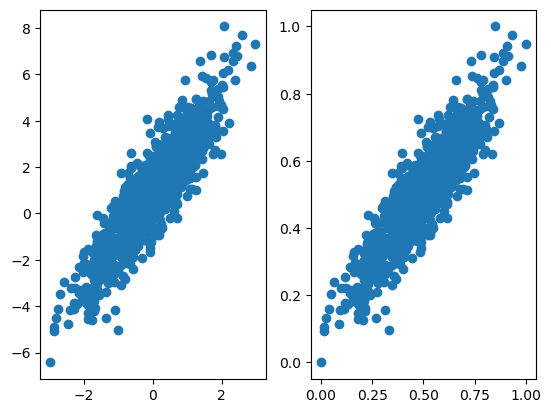

In [61]:
# 设置随机数种子
np.random.seed(24)   

# 扰动项取值为0.01
features, labels = arrayGenReg(delta=0.01)

# 绘制图像进行观察
plt.subplot(121)
plt.plot(features[:, 0], labels, 'o')
plt.subplot(122)
plt.plot(maxmin_norm(features[:, 0]), maxmin_norm(labels), 'o')

In [62]:
x = np.array([[1, 1], [3, 1]])
x_norm = np.copy(x)

x_norm[:, :1] = z_score(x_norm[:, :1])
y = np.array([[2], [4]])

np.random.seed(24)
w = np.random.randn(2, 1)
w_norm = np.copy(w)

In [63]:
w, w_res = w_cal_rec(x, w, y, gd_cal = lr_gd, lr = 0.1, itera_times = 100)
w_norm, w_res_norm = w_cal_rec(x_norm, w_norm, y, gd_cal = lr_gd, lr = 0.1, itera_times = 100)

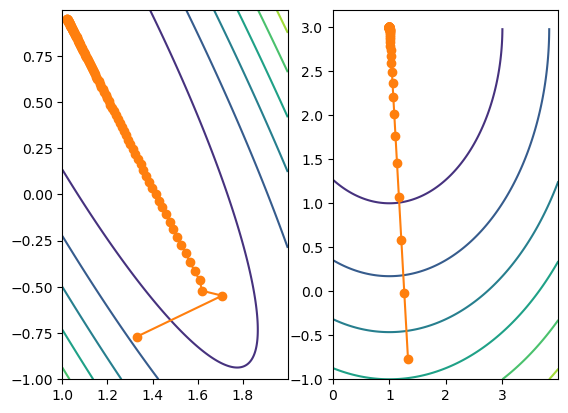

In [64]:
plt.subplot(121)
x1, x2 = np.meshgrid(np.arange(1, 2, 0.001), np.arange(-1, 1, 0.001))
plt.contour(x1, x2, (2-x1-x2)**2+(4-3*x1-x2)**2)
plt.plot(np.array(w_res)[:, 0], np.array(w_res)[:, 1], '-o', color='#ff7f0e')

plt.subplot(122)
x1, x2 = np.meshgrid(np.arange(0, 4, 0.01), np.arange(-1, 3, 0.01))
plt.contour(x1, x2, (2+x1-x2)**2+(4-x1-x2)**2)
plt.plot(np.array(w_res_norm)[:, 0], np.array(w_res_norm)[:, 1], '-o', color='#ff7f0e')

In [65]:
a = np.arange(8).reshape(4, 2)
a[1, 1] = 100
a

array([[  0,   1],
       [  2, 100],
       [  4,   5],
       [  6,   7]])

In [66]:
maxmin_norm(a)

array([[0.        , 0.        ],
       [0.33333333, 1.        ],
       [0.66666667, 0.04040404],
       [1.        , 0.06060606]])

In [67]:
z_score(a)

array([[-1.34164079, -0.65692457],
       [-0.4472136 ,  1.72970047],
       [ 0.4472136 , -0.56049527],
       [ 1.34164079, -0.51228063]])

- mini-batch

In [68]:
np.random.seed(24) 
n = features.shape[1]
w = np.random.randn(n, 1)
w_norm = np.copy(w)

Loss_l = []
Loss_norm_l = []

epoch = 50

In [69]:
np.random.seed(24)  
w = np.random.randn(3, 1)
sgd_cal(Xtrain, w, ytrain, lr_gd, batch_size=1, epoch=3000, lr=0.02)

array([[ 2.00040538],
       [-1.00028396],
       [ 1.00019138]])